# Introduction
<img src="https://i.pinimg.com/originals/4c/0b/51/4c0b5190cf49d2d3e16d8ab56c632b44.jpg" width="600">

League of Legends (LoL) is a Multiplayer Online Battle Arena, MOBA game developed and serviced by Riot Games. There are a total of three lines (TOP, MID, BOT) with about 150 champions playing the game. Normally, killing an enemy champion and destroying the final Nexus will win the game.

This data is the data of the game records of the blue and red teams for each game. There are two sets of data, one starting and building up to 10 minutes, and the other building up to 15 minutes. In addition, the data is game data of challenger users(Very Very High Rank).

Looking at the data set in a large category, the primary key for each game is the first, the win for each team, the third, the object acquisition for each team, and the fourth, the actions of users for each team.

Object data includes information about dragons, Rift herald, turrets, inhibitor, and barons, and user behavior information includes ward installation, ward removal, kill, death, assist, level, gold, and minion kill.

[Data Source](https://www.kaggle.com/gyejr95/league-of-legends-challenger-rank-game10min15min?fbclid=IwAR2ya0Su7N-B9IqROu1nQxKY4kq748gVsrHTGziU2o0GluIR5duBJMkYRkM) created by [Kaggle @Minyoung Shin](https://www.kaggle.com/gyejr95)

In this kernel, we aim for an overall exploratory data analysis. Then, we build a binary base line model of which team won.

# Table of Content
- Import Module  
- Load Data
- Data Description

# 1. Import Module

In [338]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

import shap
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.impute import SimpleImputer

import itertools
import re
import warnings
import os
print(os.listdir('../dataset'))
warnings.filterwarnings('ignore')

['Challenger_Ranked_Games_10minute.csv', 'Challenger_Ranked_Games_15minute.csv']


# 2. Load Data
Data is available 10 minutes after the start of the game and 15 minutes after the game.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [339]:
data = pd.read_csv('../dataset/Challenger_Ranked_Games_10minute.csv')
print('10 Minute Dataset Shape: ', data.shape)

10 Minute Dataset Shape:  (26409, 51)


# 3. Exploratory Data Analysis
The purpose of the EDA is to understand the data and see how the distribution of winning and losing teams differs by variable.

First, check the type of the data and check the summary statistics of the variables.

## 3.1 Check Data Type

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

The data have 47 numeric variables and 4 categorical variables. Also, all variables have not a NULL value.

View summary statistics for numeric variables.

## 3.2 Summary Statistics

In [341]:
half_columns_1 = data.columns[:26]
data[half_columns_1].describe()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,blueFirstTower,blueFirstInhibitor,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragon,blueRiftHeralds
count,2.640900e+04,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.00000,26409.000000,26409.000000,26409.000000
mean,4.171693e+09,0.501117,18189.550418,3134.712636,36.257602,7.251520,213.852247,46.313189,0.0,7.664357,...,0.071112,0.006172,0.122496,0.065205,0.031618,0.025673,0.00621,0.304517,0.307509,0.189935
std,7.498289e+07,0.500008,5500.176340,1354.808376,5.616238,1.123248,37.630372,16.706504,0.0,6.079882,...,0.257017,0.078322,0.471898,0.315923,0.191318,0.180102,0.07856,0.460211,0.465637,0.392257
min,3.482433e+09,0.000000,7792.000000,38.000000,8.000000,1.600000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.142159e+09,0.000000,15564.000000,2191.000000,34.000000,6.800000,202.000000,41.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.190538e+09,1.000000,16609.000000,2950.000000,35.000000,7.000000,221.000000,48.000000,0.0,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,4.219429e+09,1.000000,17998.000000,3847.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,4.261026e+09,1.000000,53161.000000,16248.000000,62.000000,12.400000,296.000000,144.000000,0.0,61.000000,...,1.000000,1.000000,9.000000,5.000000,3.000000,3.000000,1.00000,1.000000,2.000000,1.000000


In [342]:
half_columns_2 = data.columns[26:]
data[half_columns_2].describe()

,redWins,redTotalGolds,redCurrentGolds,redTotalLevel,redAvgLevel,redTotalMinionKills,redTotalJungleMinionKills,redFirstBlood,redKill,redDeath,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
count,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000
mean,0.498883,18162.025294,3115.994888,36.281041,7.256208,214.084403,47.043205,0.0,7.651520,7.664357,...,0.092999,0.008141,0.158847,0.083494,0.038245,0.037109,0.008179,0.370366,0.372790,0.135446
std,0.500008,5513.151861,1352.297406,5.580625,1.116125,37.615638,16.802328,0.0,6.089395,6.079882,...,0.290436,0.089862,0.546485,0.372633,0.211865,0.212246,0.090069,0.482912,0.486912,0.342206
min,0.000000,7920.000000,215.000000,16.000000,3.200000,21.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15533.000000,2177.000000,34.000000,6.800000,202.000000,42.000000,0.0,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16598.000000,2918.000000,35.000000,7.000000,222.000000,49.000000,0.0,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17979.000000,3825.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,58285.000000,20642.000000,61.000000,12.200000,301.000000,121.000000,0.0,65.000000,61.000000,...,1.000000,1.000000,8.000000,5.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000


## 3.3 Label
There are blue team win variables and red team win variables within the data. 

We will only use the blue team victory variable(blueWins) here.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [343]:
data.drop(columns = 'redWins', inplace = True)
print("Data Shape Without redWins : ", data.shape)

Data Shape Without redWins :  (26409, 50)


In [344]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'blueWins'), data['blueWins'], test_size = 0.25, random_state = 42)

train = pd.concat([X_train, y_train], axis = 1)
train.reset_index(drop = True, inplace = True)
test = pd.concat([X_test, y_test], axis = 1).reset_index(drop = True)
test.reset_index(drop = True, inplace = True)

print("Train Data Shape : ", train.shape)
print("Test Data Shape : ", test.shape)

Train Data Shape :  (19806, 50)
Test Data Shape :  (6603, 50)


Check the class ratio for the blueWins variable.

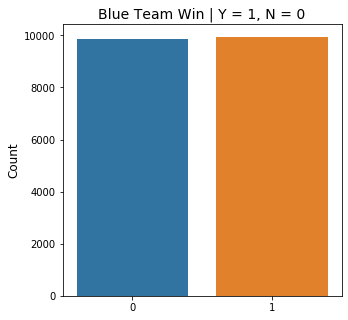

In [345]:
plt.figure(figsize=(5, 5))

sns.countplot(train['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

The blue team's winning percentage was found to be little different.

## 3.4 Categorical Variable

### 3.4.1 String Type

- blueFirstTowerLane: Blue team's first kill lane for 10 minutes.


- blueDragnoType: Type of Dragon killed by Blue Team for 10 minutes.


- redFirstTowerLane: Red team's first kill lane for 10 minutes.


- redDragnoType: Type of Dragon killed by Red Team for 10 minutes.

Let's check the frequency of categorical variables.

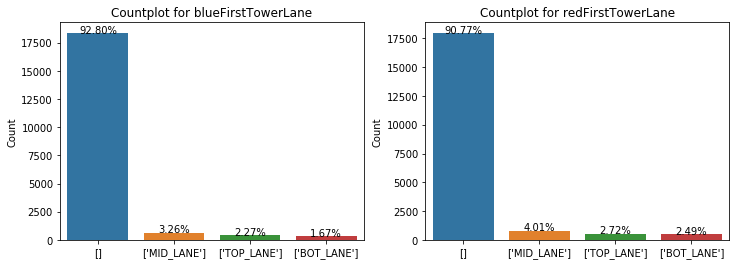

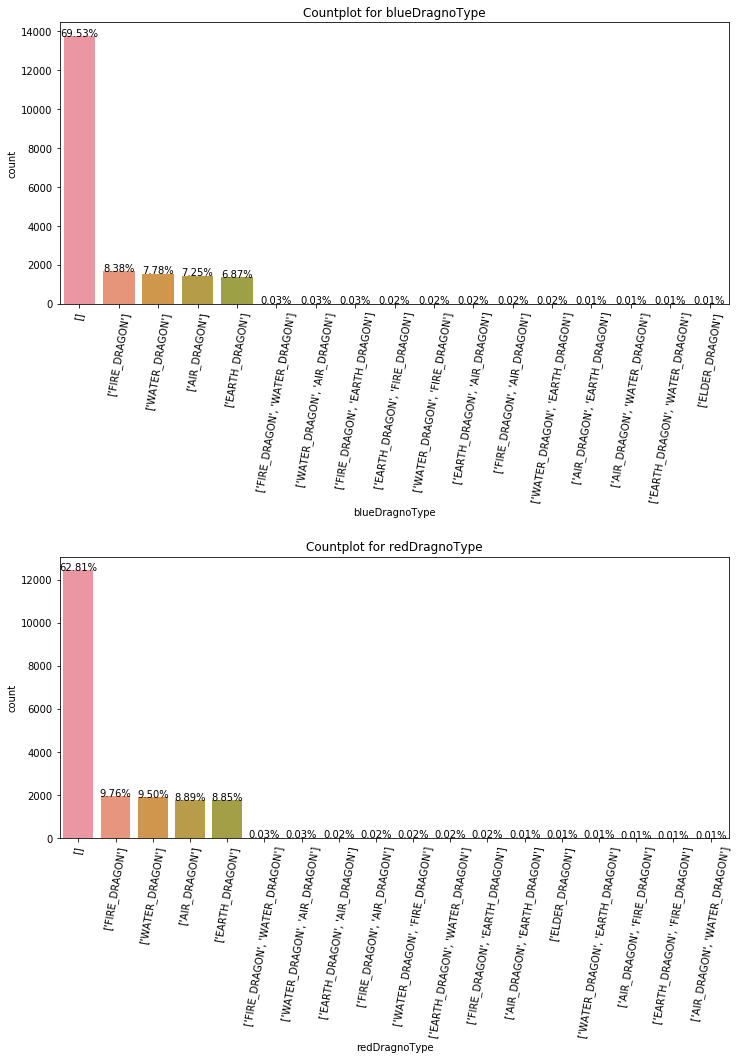

In [346]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("Countplot for {}".format(cat_col))
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.title("Countplot for {}".format(cat_col))
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)

In most games, line kill didn't occur for 10 minutes. Also, the number of times a dragon was killed was less than one.

Here's to note: some of the games killed the elder dragon within 10 minutes of its beginning. The elder dragon appears after a team kills up to four dragons. This game is likely to have been misobserved because the first dragon is created five minutes after the game starts. Therefore, check the game that killed the elder dragon first.

In [347]:
train.loc[(train['blueDragnoType'] == "['ELDER_DRAGON']") | (train['redDragnoType'] == "['ELDER_DRAGON']")]

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
7432,3959729584,37287,7519,40,8.0,150,5,0,18,21,...,3,1,0,2,0,1,['ELDER_DRAGON'],1,0,0
12604,3957862092,50508,6165,51,10.2,245,43,0,35,44,...,1,0,1,0,0,0,[],0,0,1
14981,3942684660,38444,2159,45,9.0,217,53,0,24,32,...,3,1,2,0,0,1,['ELDER_DRAGON'],1,0,0


Among the training data, it can be seen that only three matches were observed. Among the training data, it can be seen that only three matches were observed. Among them, the Blue and Red teams killed the elder dragon once and twice, respectively.

As I said before, the dragon first appears five minutes after the start of the game. So it's impossible to kill a dragon twice within 10 minutes of the game.

In [348]:
train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
320,4121847711,43720,6035,46,9.2,255,22,0,30,11,...,0,0,0,0,0,0,[],0,0,1
329,4088525106,43005,4959,48,9.6,172,43,0,42,40,...,1,1,0,0,0,0,[],0,0,0
531,4123586420,41819,6999,44,8.8,204,24,0,33,23,...,1,0,1,0,0,0,[],0,0,1
1182,4105961472,46115,3916,47,9.4,249,43,0,32,28,...,0,0,0,0,0,0,[],0,0,1
1305,4126782387,46719,4441,48,9.6,191,144,0,40,29,...,2,1,1,0,0,0,[],0,0,1


A total of 39 game ids were observed where this impossible situation occurs. One thing to note is that in this case, the Red team didn't kill one dragon.

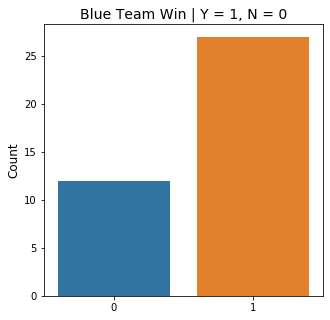

In [349]:
blue_over_two_dragon = train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(blue_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

If you don't assume this is anomaly, you can see that the team that killed two or more dragons is more likely to win within 10 minutes of the game.

In [350]:
train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
185,4156414549,40806,3381,47,9.4,200,29,0,30,41,...,3,2,0,1,0,1,"['FIRE_DRAGON', 'WATER_DRAGON']",2,0,0
490,4135691926,36518,4898,44,8.8,227,24,0,16,26,...,0,0,0,0,0,1,"['EARTH_DRAGON', 'AIR_DRAGON']",2,0,0
848,4128737503,47386,2568,48,9.6,249,17,0,38,26,...,1,0,1,0,0,1,"['WATER_DRAGON', 'FIRE_DRAGON']",2,0,1
1947,4131643571,35955,4230,43,8.6,187,6,0,23,42,...,4,1,1,2,0,1,"['EARTH_DRAGON', 'WATER_DRAGON']",2,0,0
3303,4137430963,35150,6215,41,8.2,184,4,0,17,32,...,5,1,1,3,1,1,"['FIRE_DRAGON', 'AIR_DRAGON']",2,0,0


Likewise, if the Red team had killed more than two dragons, the Blue team couldn't have killed one dragon.

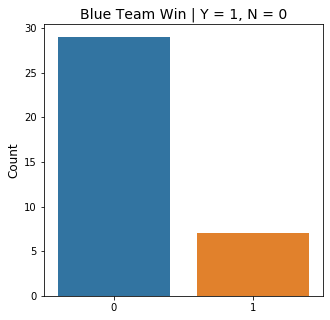

In [351]:
red_over_two_dragon = train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(red_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

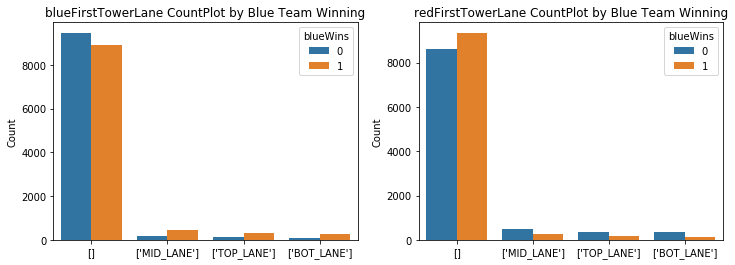

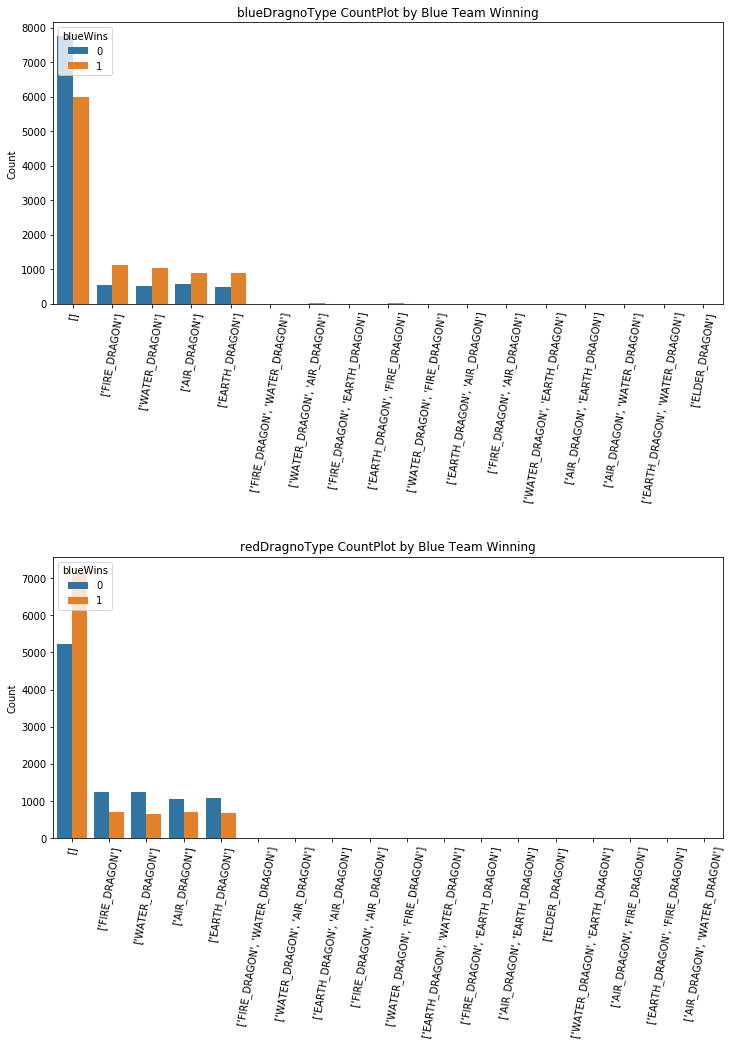

In [352]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'],order = train[cat_col].value_counts().index)
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("{} CountPlot by Blue Team Winning".format(cat_col))
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'], order = train[cat_col].value_counts().index)
    
    plt.title("{} CountPlot by Blue Team Winning".format(cat_col))
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)

If the first kill occurs on the line within 10 minutes of the start of the game, there is a higher chance of winning. On the other hand, if a kill does not occur, the chances of winning are reduced.

If the Red team didn't kill on the line within 10 minutes of the start of the game, the Blue team has a higher percentage of wins.

<b>Through this phenomenon, it can be seen that a line kill occurs within 10 minutes of the game's start is a factor that affects the game.
Within 10 minutes of the start of the game, you can see that the result of which team kills the dragon also affects the game.</b>

### 3.4.2 Numerical Type

- blueFirstBlood: Blue Team wheather first blood


- blueFirstTower: Blue Team wheather first tower


- blueFirstInhibitor: Blue Team wheather first Inhibitor


- blueFirstDragon: Blue Team wheather first Dragon


- redFirstBlood: Red Team wheather first Blood


- redFirstTower: Red Team wheather first Tower


- redFirstInhibitor: Red Team wheather first Inhibitor


- redFirstDragon: Red Team wheather first Dragon


Other variables are found by performing exploratory data analysis.

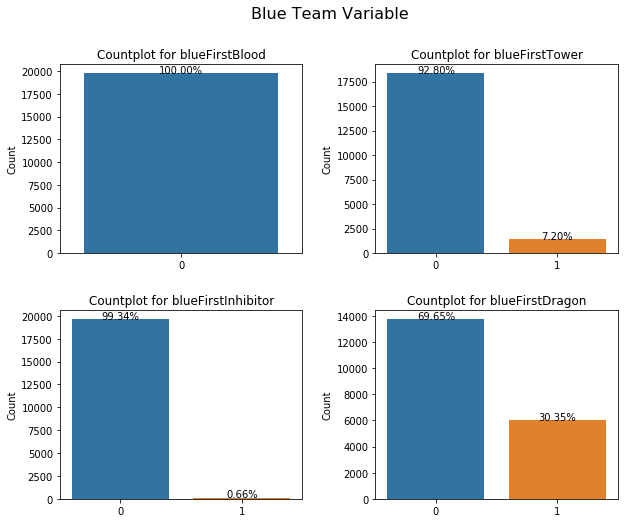

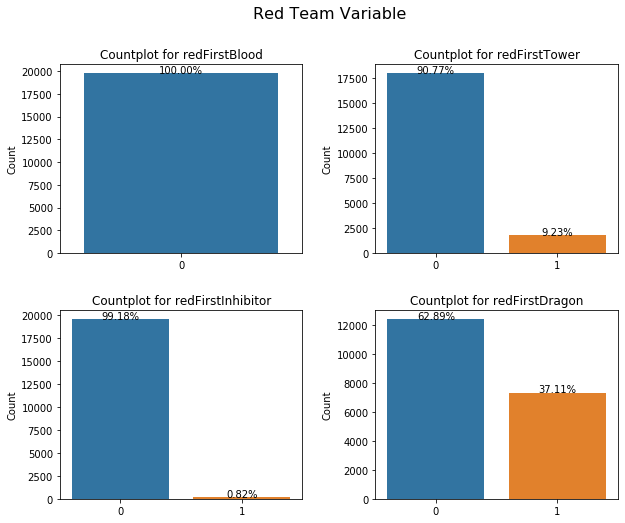

In [353]:
cat_cols_num = ['blueFirstBlood', 'blueFirstTower', 'blueFirstInhibitor', 'blueFirstDragon',
      'redFirstBlood', 'redFirstTower', 'redFirstInhibitor', 'redFirstDragon']

total = len(train)

f = plt.figure(figsize = (10, 8))
plt.suptitle("Blue Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[:4]):
    f.add_subplot(2, 2, i + 1)
    
    ax = sns.countplot(train[cat_col_num])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
        
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
f = plt.figure(figsize = (10, 8))
plt.suptitle("Red Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[4:]):
    f.add_subplot(2, 2, i + 1)
    
    ax = sns.countplot(train[cat_col_num])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
        
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

Something strange has been discovered. It showed that the Blue team didn't play the first Blood in all the games. It also showed that the Red team didn't play the first Blood in all games. This is a completely different result from the previous FirstTowerLane variable. It is necessary to check this.

#### 3.4.2.1 FirstTower, FirstDragon

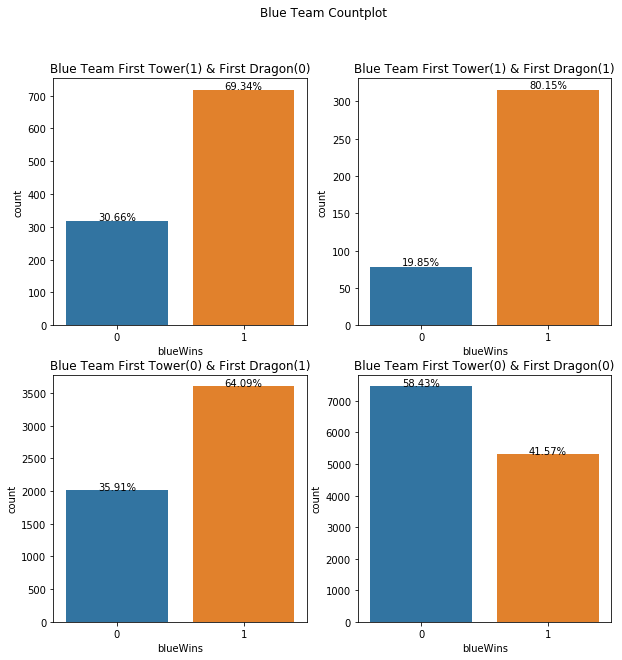

In [354]:
lst = [1,0,1]
c = itertools.combinations(lst, 2)
c_list = list(c)
c_list.append((0,0))

f = plt.figure(figsize = (10, 10))
plt.suptitle("Blue Team Countplot")

for i,c in enumerate(c_list): 
    df = train.loc[(train['blueFirstTower'] == c[0]) & (train['blueFirstDragon'] == c[1])]
    total = len(df)
    
    f.add_subplot(2, 2, i + 1)
    ax = sns.countplot('blueWins', data = df)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/total*100),
               ha = 'center')
        
    plt.title('Blue Team First Tower({}) & First Dragon({})'.format(c[0], c[1]))

When the Blue team first killed the dragon and smashed the tower within 10 minutes of the start of the game, it can be seen that the winning percentage has risen sharply. The odds were higher if they smashed the tower than if they killed the dragon first within 10 minutes of the game. On the other hand, if everyone is not down first, you can see that the chances of winning are dramatically reduced.

<b>In order to win within 10 minutes of the game, it is advantageous to kill the first dragon and tower before the opponent team. If it is difficult, it would be advantageous to destroy the tower first.</b>

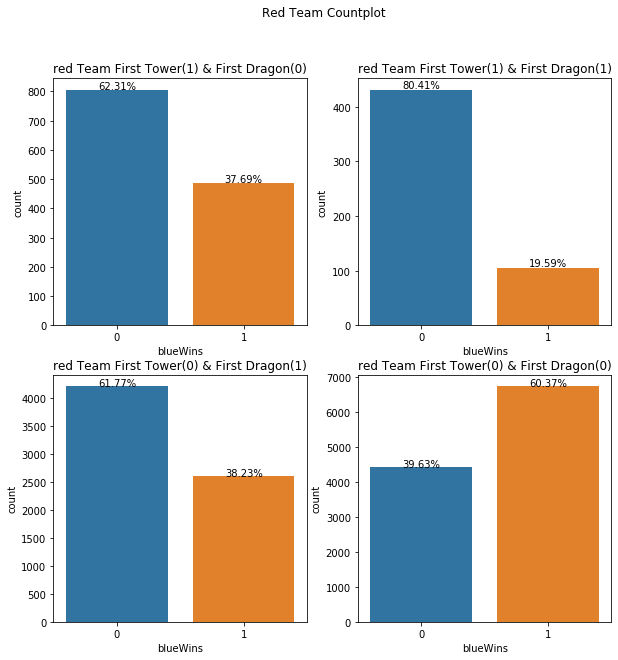

In [355]:
f = plt.figure(figsize = (10, 10))
plt.suptitle("Red Team Countplot")
for i,c in enumerate(c_list):   
    df = train.loc[(train['redFirstTower'] == c[0]) & (train['redFirstDragon'] == c[1])]
    total = len(df)
    f.add_subplot(2, 2, i + 1)
    
    ax = sns.countplot('blueWins', data = df)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/total*100),
               ha = 'center')
        
    plt.title('red Team First Tower({}) & First Dragon({})'.format(c[0], c[1]))

If the Red team had put the towers and dragons ahead of the opponents within 10 minutes of the start of the game, the Blue team's winning rate would be very low.If the Red team destoryed the tower first than the Dragon, the Blue team has a lower winning rate.On the other hand, if the Red team didn't get rid of anything first, you can see that the Blue team has a high winning rate.

After checking the Blue team's winning rate if the dragon is killed first or if the tower is broken for both teams, the following conclusions can be drawn.

<b> The favorable condition for the Blue team to win is to destroy the dragon and break the tower before the Red team. If that's difficult, it's advantageous to break down the tower first. If either of them is difficult to achieve, the dragon and tower should not be taken away first by the Red Team. </b>

In more detail than we've seen so far, see which line you've destroyed increases your Blue team's winning rate.

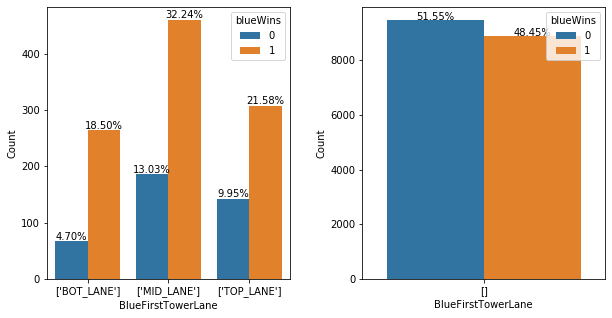

In [356]:
df = train.loc[(train['blueFirstTower'] == 1) & (train['blueFirstTowerLane'] != '[]')]
total = len(df)

f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ax = sns.countplot('blueFirstTowerLane',hue = 'blueWins', data =df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha = 'center')
    
plt.xlabel("BlueFirstTowerLane")
plt.ylabel("Count")

df = train.loc[(train['blueFirstTower'] == 0) & (train['blueFirstTowerLane'] == '[]')]
total = len(df)

f.add_subplot(1, 2, 2)
ax = sns.countplot('blueFirstTowerLane', hue = 'blueWins', data = df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha = 'center')
    
plt.xlabel("BlueFirstTowerLane")
plt.ylabel("Count")

plt.subplots_adjust(wspace = 0.3)

If the Blue team destroys the Bot Tower first, we can see that the Blue team has a higher chance of winning. Mid Tower and Top Tower followed.

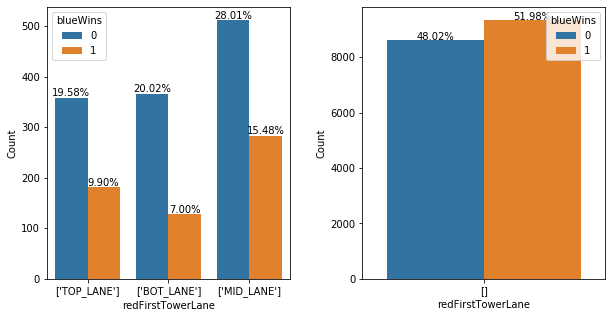

In [357]:
df = train.loc[(train['redFirstTower'] == 1) & (train['redFirstTowerLane'] != '[]')]
total = len(df)
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ax = sns.countplot('redFirstTowerLane', hue = 'blueWins',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha = 'center')

plt.xlabel("redFirstTowerLane")
plt.ylabel("Count")

df = train.loc[(train['redFirstTower'] == 0) & (train['redFirstTowerLane'] == '[]')]
total = len(df)

f.add_subplot(1, 2, 2)
ax = sns.countplot('redFirstTowerLane', hue = 'blueWins', data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha = 'center')
    
plt.xlabel("redFirstTowerLane")
plt.ylabel("Count")

plt.subplots_adjust(wspace = 0.3)

If the Red team destroys the Bot Tower first, the Blue team will have a lower chance of winning. Mid Tower and Top Tower followed, but not much difference.

Now, see which dragons you've killed first, which increases your chances of winning the Blue team's

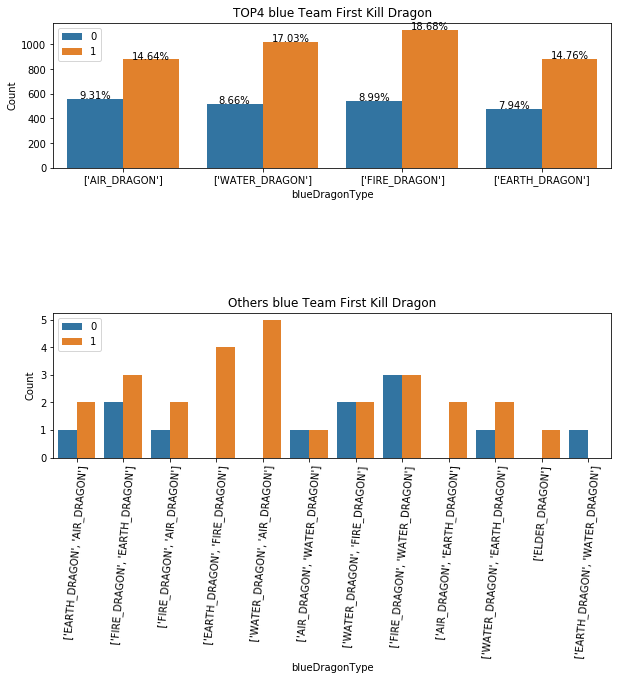

In [358]:
top4 = train.loc[train["blueDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])]
top4_total = len(top4)
others = train.loc[(~train["blueDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])) & (train['blueFirstDragon'] != 0)]

f = plt.figure(figsize = (10, 8))

f.add_subplot(2, 1, 1)
ax = sns.countplot('blueDragnoType',hue = 'blueWins', data = top4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/top4_total*100),
            ha = 'center')

plt.title("TOP4 blue Team First Kill Dragon")
plt.xlabel("blueDragonType")
plt.ylabel("Count")
plt.legend(loc = 'best')

f.add_subplot(2, 1, 2)

ax = sns.countplot('blueDragnoType', hue = 'blueWins', data = others)
    
plt.title("Others blue Team First Kill Dragon")
plt.xlabel("blueDragonType")
plt.ylabel("Count")
plt.legend(loc = 'best')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 85)

plt.subplots_adjust(hspace= 1)

It can be seen that the Blue team has the highest winning rate when it kills the Dragon of Fire.

Killing two or more dragons within 10 minutes of the game is realistically very difficult. In fact, these values have been shown to be rarely observed.

Now, check the dragons that Red Team has killed. Based on the results obtained by the Blue team, the following assumptions can be made:
<b> If the Red team kills the Dragon of Fire within 10 minutes of the start of the game, the Blue team's winning rate drops the most.</b>

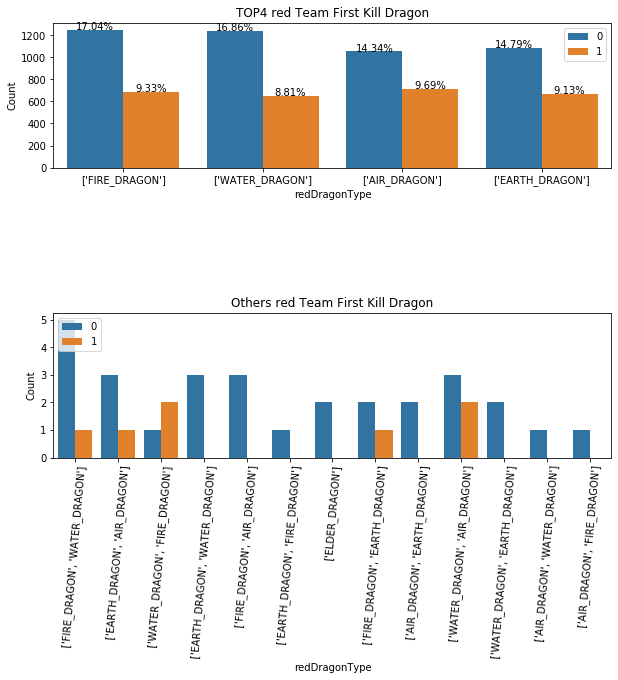

In [359]:
top4 = train.loc[train["redDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])]
top4_total = len(top4)
others = train.loc[(~train["redDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])) & (train['redFirstDragon'] != 0)]

f = plt.figure(figsize = (10, 8))

f.add_subplot(2, 1, 1)
ax = sns.countplot('redDragnoType',hue = 'blueWins', data = top4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/top4_total*100),
            ha = 'center')

plt.title("TOP4 red Team First Kill Dragon")
plt.xlabel("redDragonType")
plt.ylabel("Count")
plt.legend(loc = 'best')

f.add_subplot(2, 1, 2)

ax = sns.countplot('redDragnoType', hue = 'blueWins', data = others)
    
plt.title("Others red Team First Kill Dragon")
plt.xlabel("redDragonType")
plt.ylabel("Count")
plt.legend(loc = 'best')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 85)

plt.subplots_adjust(hspace= 1)

If the Red team got rid of the Dragon of Fire within 10 minutes of the game, the winning rate was about 35%. In addition, the winning rate was about 34 percent when the water dragon was killed.

<b>The best way to increase the chances of the Blue team winning is to kill the Dragon of Fire first within 10 minutes of the game, or the Red Team interrupts the Dragon of Water.</b>

So far, within 10 minutes of the game, we've considered destroying the tower and killing the dragon, and we've looked at options to maximize the Blue team's winning rate. Through this process, the following conclusions were obtained:

The condition to get the Blue team's highest winning percentage by using two variables is to destroy the tower and kill the dragon before the opponent within 10 minutes of the game. <b>The highest winning rate can be guaranteed if the Bot Tower is destroyed and the Dragon of Fire is destroyed. On the other hand,The worst condition for the Blue team's victory is when the Red team first destroyed the Bottom Tower and destroyed the Water Dragon.</b>

We're going back to the team's Countplot.

Both the Blue team and the Red team had less than 10 percent of the towers within 10 minutes of the game.

Due to the location of the inhibitor, it is difficult to destroy within 10 minutes of the game. In fact, the rate at which inhibitors were destroyed was less than 1 percent. The team that destroyed the inhibitor within 10 minutes of the game is expected to have won with a very high probability.

The training data showed that the Blue team killed the first dragon within 10 minutes of the game. On the other hand, for the Red team, the training data was about 37 percent higher.

A question arose here. If the variable for the Blue team is 1, will the variable for the Red team be 0?

In [360]:
blue = cat_cols_num[:4]
red = cat_cols_num[4:]

for b, r in zip(blue, red):
    print("{} concurrent row (1,1) : ".format(b[4:]), train.loc[(train[b] == 1) & (train[r] == 1)].shape[0])

FirstBlood concurrent row (1,1) :  0
FirstTower concurrent row (1,1) :  0
FirstInhibitor concurrent row (1,1) :  0
FirstDragon concurrent row (1,1) :  0


Simultaneous variable values did not exist.

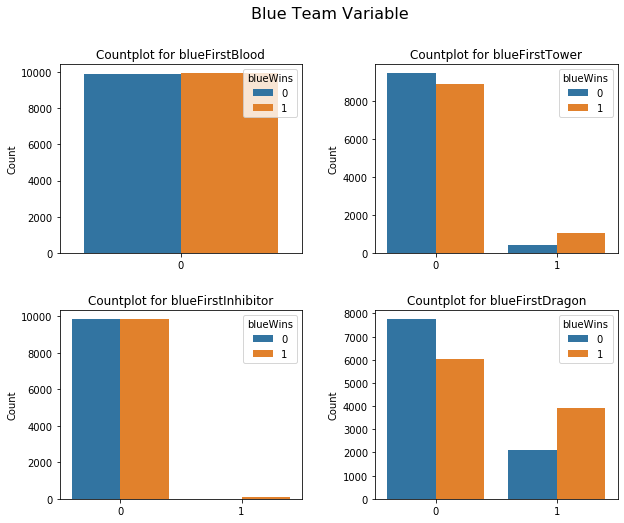

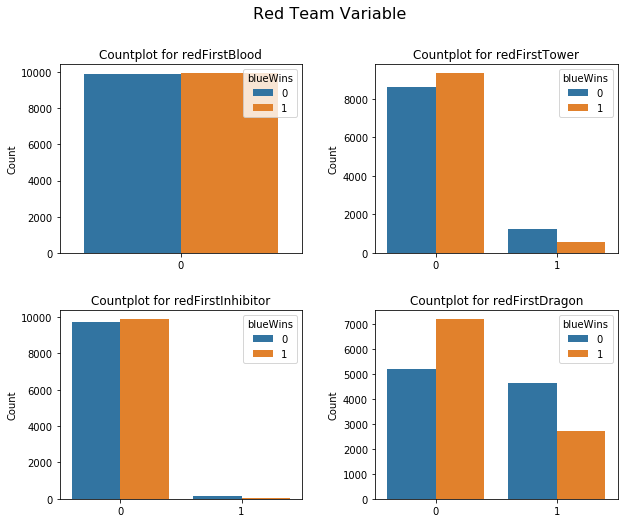

In [361]:
f = plt.figure(figsize = (10, 8))
plt.suptitle("Blue Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[:4]):
    f.add_subplot(2, 2, i + 1)

    sns.countplot(train[cat_col_num], hue = 'blueWins', data = train)

    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
f = plt.figure(figsize = (10, 8))
plt.suptitle("Red Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[4:]):
    f.add_subplot(2, 2, i + 1)

    sns.countplot(train[cat_col_num], hue = 'blueWins', data = train)
     
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

The results of visualizing the Countplots by the blue team's victory showed that:

- If the Blue team destroyed the Tower first, the winning percentage rose sharply. On the other hand, if the Red Team destroys it first, the winning percentage dropped sharply.


- This phenomenon was also seen in inhibitor and dragon variables.


<b>In conclusion, it can be seen that within 10 minutes of the start of the game, depending on which team destroies the towers, inhibitors, and dragons, it affects the game a lot.</b>

## 3.5 Numerical Variable

The data have 37 numeric variables.

Here, the gameId variable is a numeric variable but is not used for analysis because it is a unique id for the game itself.

In [362]:
cat_cols.extend(cat_cols_num) # total categorical variable 

### 3.5.1 Blue Team Variable

The total number of variables for the Blue team was 18. Let's check the distribution first.

In [363]:
num_cols = train.drop(columns = cat_cols).columns

blue_num_cols = num_cols[1:19]
red_num_cols = num_cols[19:-1]

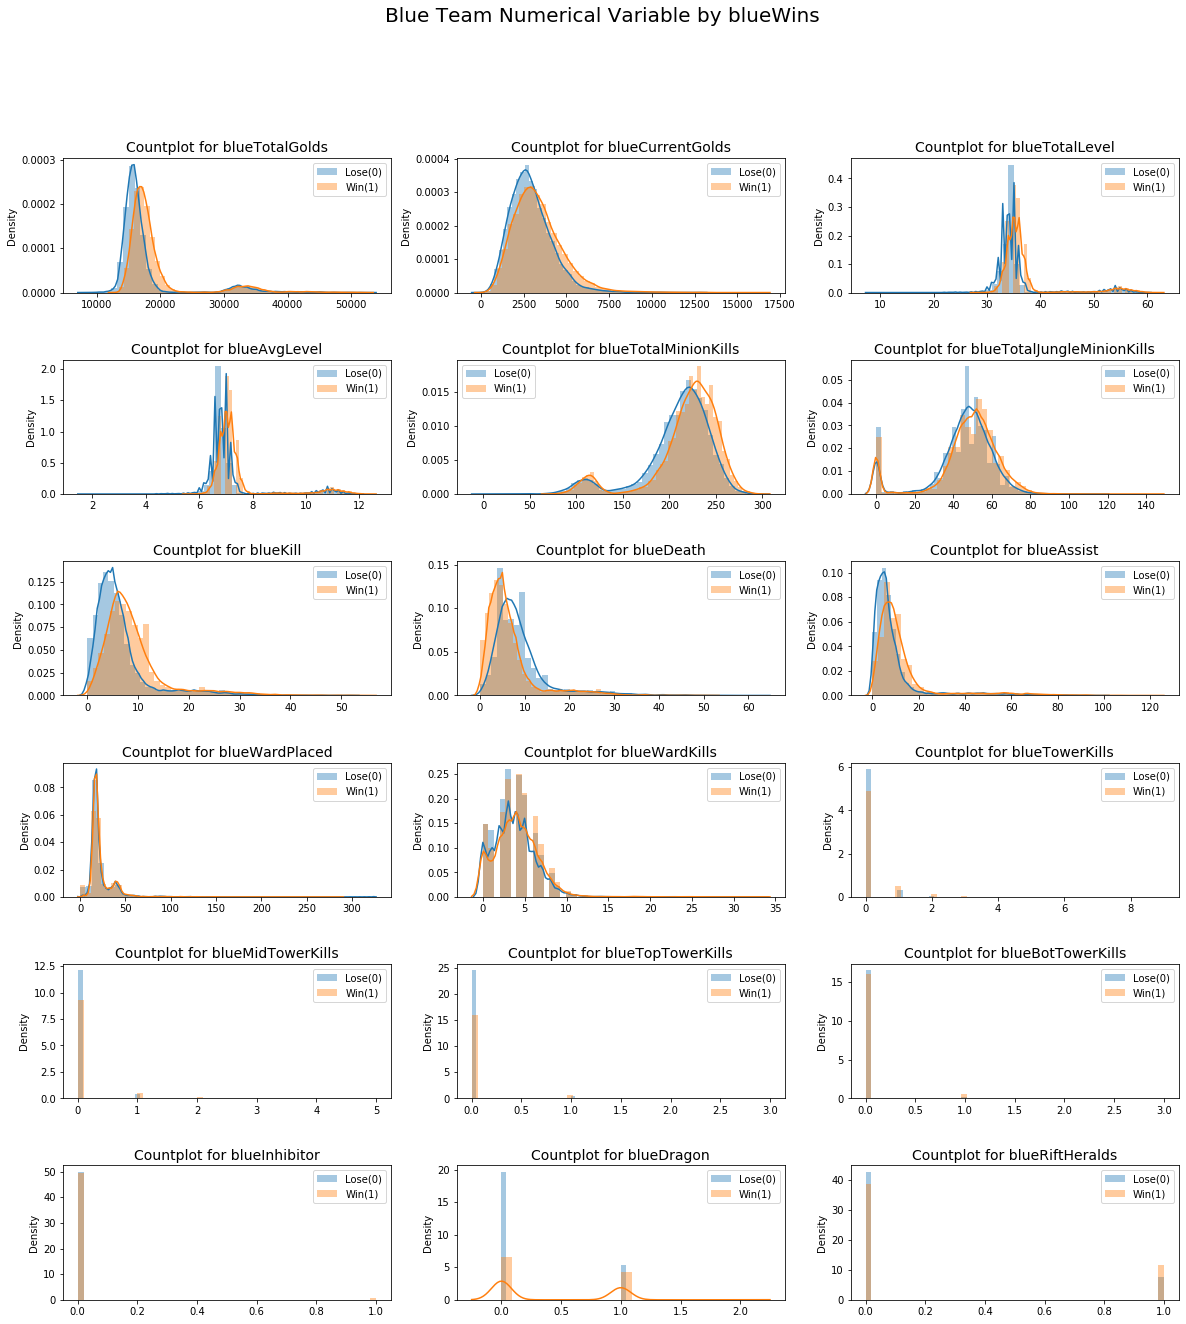

In [364]:
f = plt.figure(figsize = (20, 21))
plt.suptitle("Blue Team Numerical Variable by blueWins", fontsize = 20)

for i, num_col in enumerate(blue_num_cols):
        
        f.add_subplot(6, 3, i + 1)
        sns.distplot(train.loc[train['blueWins'] == 0][num_col], label = 'Lose(0)')
        sns.distplot(train.loc[train['blueWins'] == 1][num_col], label = 'Win(1)')
        
        plt.legend(loc = 'best')
        plt.title("Countplot for {}".format(num_col), fontsize = 14)
        plt.xlabel("")
        plt.ylabel("Density")
        plt.subplots_adjust(hspace = 0.5)

The distribution shows that blueTotalGolds, blueCurrentGolds, have some influence on victory. 

There are ways to earn gold in the League of Legends either by killing Minions or by killing opponents.

Kill, Death and Assist variables are also seen as factors affecting the victory.  
These variables can be reinterpreted as in-game influences called kda within the League of Legends.

After the blueWardKills variable, you can see that discrete values are shown. Therefore, these variables perform separate analyses.

- WardKills: Num of warding killed


- TowerKills: Tower Kill counts


- MidTowerKills: Mid Tower destroy counts


- TopTowerKills: Top Tower destroy counts


- BotTowerKills: Bot Tower destroy counts


- Dragon: Dragon Kill counts


- RiftHeralds: RiftHeralds Kill counts



We can see that $TowerKills = MidTowerKills + BotTowerKills + TopTowerKills$.

### 3.5.2 Red Team Variable

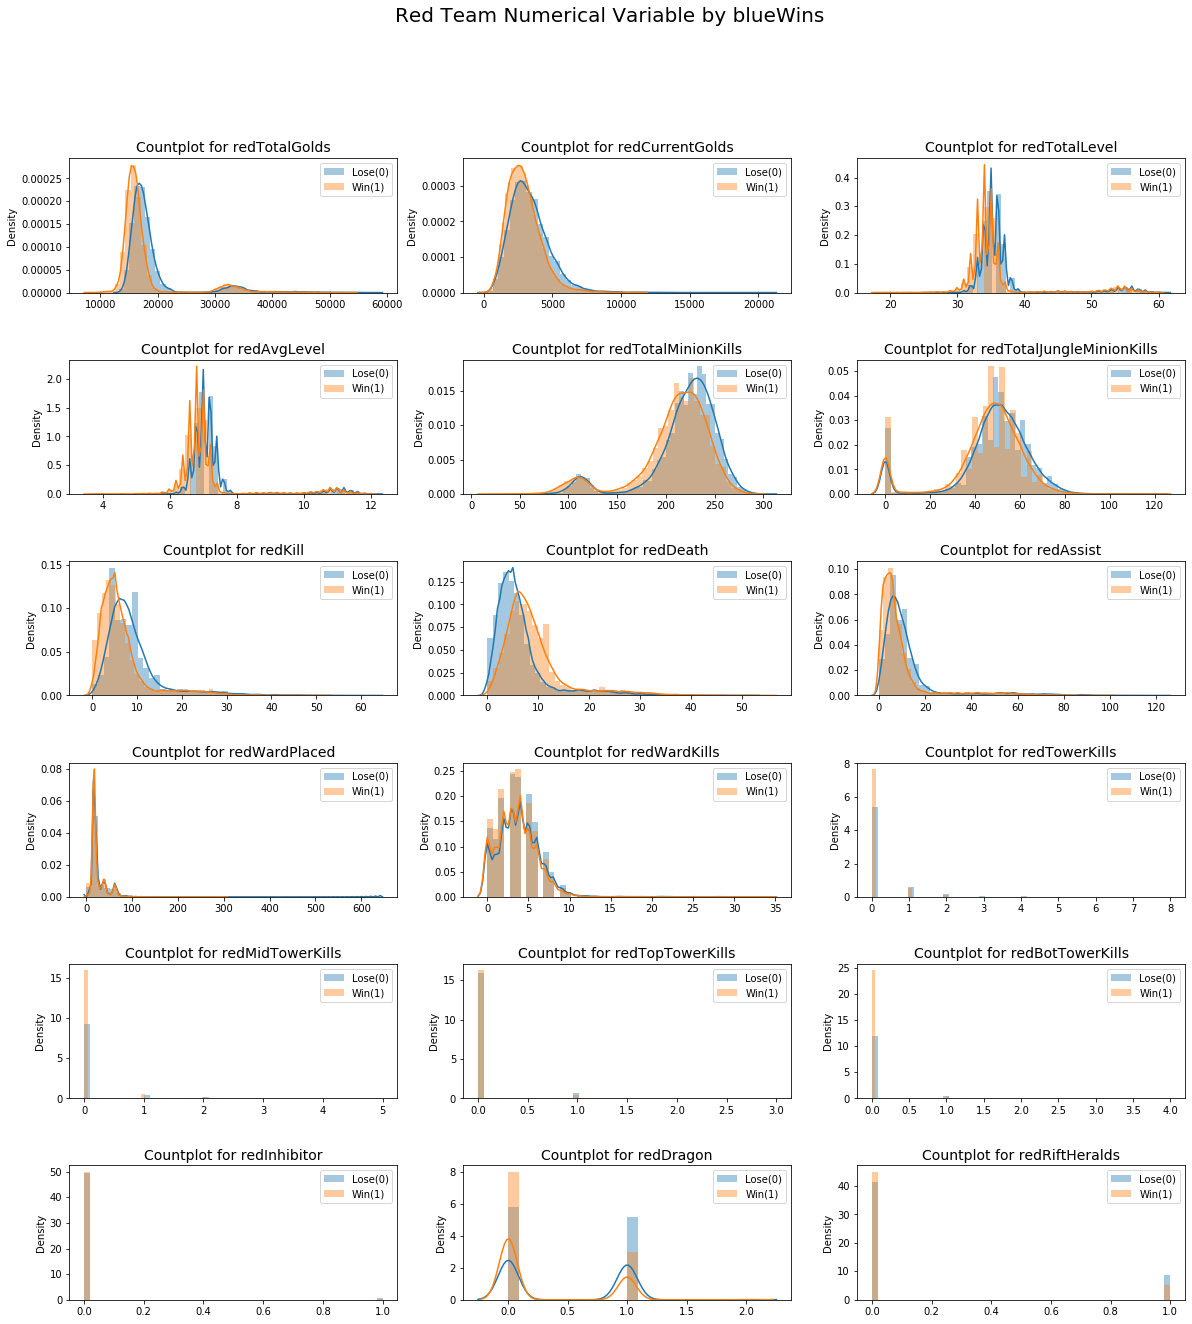

In [365]:
f = plt.figure(figsize = (20, 21))
plt.suptitle("Red Team Numerical Variable by blueWins", fontsize = 20)

for i, num_col in enumerate(red_num_cols):
        
        f.add_subplot(6, 3, i + 1)
        sns.distplot(train.loc[train['blueWins'] == 0][num_col], label = 'Lose(0)')
        sns.distplot(train.loc[train['blueWins'] == 1][num_col], label = 'Win(1)')
        
        plt.legend(loc = 'best')
        plt.title("Countplot for {}".format(num_col), fontsize = 14)
        plt.xlabel("")
        plt.ylabel("Density")
        plt.subplots_adjust(hspace = 0.5)

### 3.5.3 kd/a
The kd/a score shows the kill involvement of one life in the game.

kd/a can be expressed in the following formula:  


$ \large kd/a \ score = \frac {Player's \ Kill + Player's \ Assist}{Player's \ Death}\ $

If the number of deaths across the team is 0, the kd/a score is infinite. At this point, the kd/a score is called 'Perfect'.
It cannot be digitized. Therefore, let's calculate a value of 1, as a denominator.

Data cannot indicate kd/a for individual players. Therefore, we create a kd/a variable for the entire team, and then check the distribution.

In [366]:
train['blueKd/a'] = (train['blueKill'] + train['blueAssist']) / train['blueDeath']
train['redKd/a'] = (train['redKill'] + train['redAssist']) / train['redDeath']

print("Num of Blue Team Kd/a Score, NA :", train.loc[train['blueKd/a'].isna()].shape[0])
print("Num of red Team Kd/a Score, NA : ", train.loc[train['redKd/a'].isna()].shape[0])

Num of Blue Team Kd/a Score, NA : 8
Num of red Team Kd/a Score, NA :  8


In [367]:
train.loc[train['blueKd/a'].isna()][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'blueKd/a']]

,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,blueKd/a
2618,0,0,0,0,0,0,NaN
5064,0,0,0,0,0,0,NaN
5867,0,0,0,0,0,0,NaN
7548,0,0,0,0,0,0,NaN
7772,0,0,0,0,0,0,NaN
8671,0,0,0,0,0,0,NaN
12835,0,0,0,0,0,0,NaN
19631,0,0,0,0,0,0,NaN


In [368]:
print("Num of [Blue Team] Death 0 & Kill, Assist not 0: ", train.loc[~np.isfinite(train['blueKd/a'])].shape[0])
train.loc[~np.isfinite(train['blueKd/a'])][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'blueKd/a']].head()

Num of [Blue Team] Death 0 & Kill, Assist not 0:  170


,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,blueKd/a
128,44,24,0,0,0,44,inf
166,4,3,0,0,0,4,inf
301,4,4,0,0,0,4,inf
542,2,2,0,0,0,2,inf
575,8,10,0,0,0,8,inf


In [369]:
print("Num of [Red Team] Death 0 & Kill, Assist not 0: ", train.loc[~np.isfinite(train['blueKd/a'])].shape[0])
train.loc[~np.isfinite(train['redKd/a'])][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'redKd/a']].head()

Num of [Red Team] Death 0 & Kill, Assist not 0:  170


,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,redKd/a
96,0,0,7,7,7,0,inf
260,0,0,15,15,22,0,inf
443,0,0,2,2,6,0,inf
721,0,0,12,12,12,0,inf
790,0,0,7,7,8,0,inf


In [370]:
train.loc[~np.isfinite(train['blueKd/a']), 'blueKd/a'] = (train['blueKill'] + train['blueAssist']) / 1
train.loc[~np.isfinite(train['redKd/a']), 'redKd/a'] = (train['redKill'] + train['redAssist']) / 1

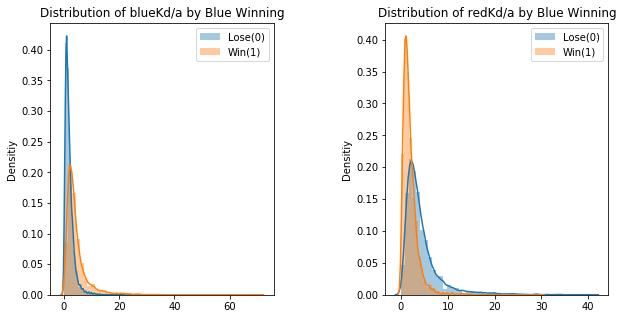

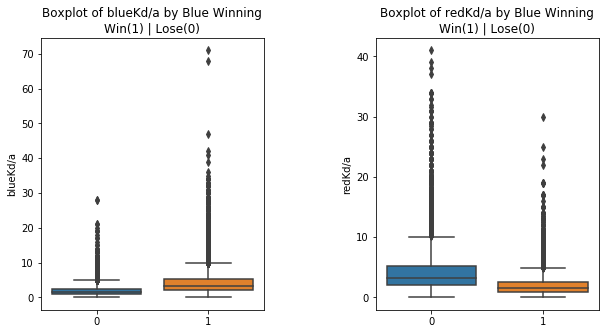

In [371]:
kda_list = ['blueKd/a', 'redKd/a']

f = plt.figure(figsize = (10, 5))

for i, kda in enumerate(kda_list):
    f.add_subplot(1, 2, i + 1)

    sns.distplot(train.loc[train['blueWins'] == 0][kda], label = 'Lose(0)')
    sns.distplot(train.loc[train['blueWins'] == 1][kda], label = 'Win(1)')
    
    plt.title("Distribution of {} by Blue Winning".format(kda))
    plt.legend(loc = 'best')
    plt.xlabel("")
    plt.ylabel("Densitiy")
    plt.subplots_adjust(wspace = 0.5)

f = plt.figure(figsize = (10, 5))

for i, kda in enumerate(kda_list):
    f.add_subplot(1, 2, i + 1)

    sns.boxplot(y = train[kda],x = 'blueWins', data = train)

    plt.title("Boxplot of {} by Blue Winning\nWin(1) | Lose(0)".format(kda))
    plt.xlabel("")
    plt.ylabel("{}".format(kda))
    plt.subplots_adjust(wspace = 0.5)

Although there is no noticeable difference, a low kd/a score indicates a slight drop in the winning percentage. Therefore, the kd/a score is thought to be a variable that affects victory.

### 3.5.4 Correlation

Check the correlation coefficient except for discrete variables showing numerical values.

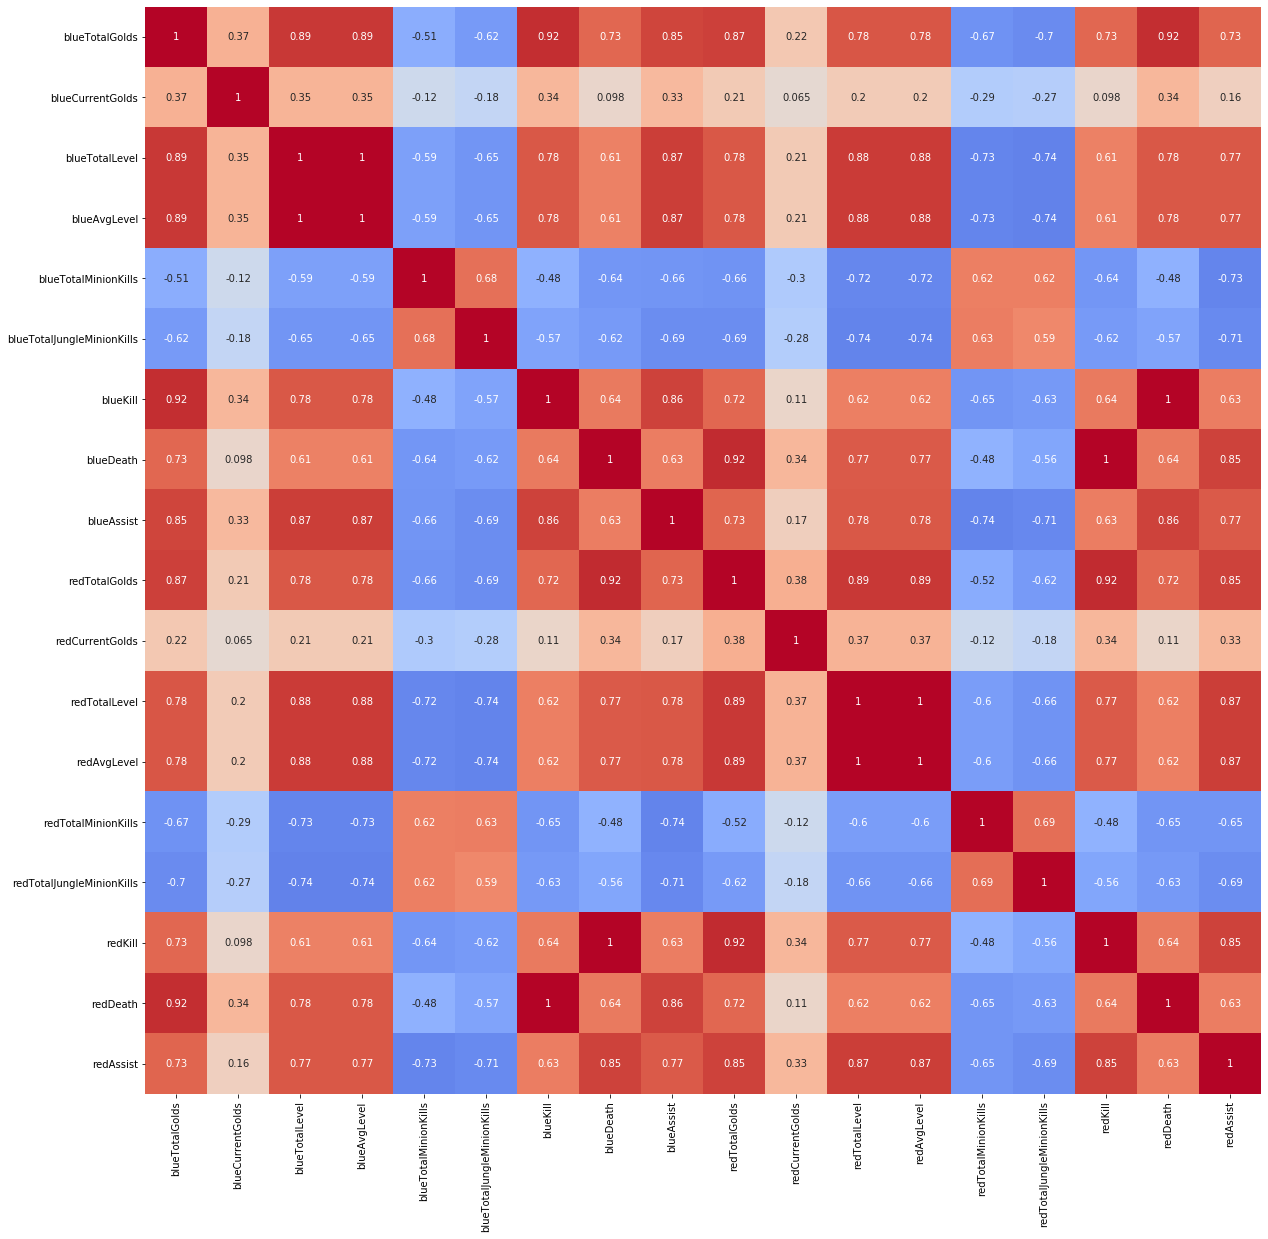

In [372]:
cont_num_cols = num_cols[(~num_cols.str.contains('gameId|TowerKills|WardKills|Dragon|RiftHeralds|blueWins|Ward|Inhibitor'))]

correlation = train[cont_num_cols].corr()

plt.figure(figsize = (20, 20))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True, cbar = False, cmap = 'coolwarm')

plt.show()

The Blue team's kill numbers and the amount of gold acquired are very strong correalation (0.92). The number of kills for the Blue team and the number of deaths for the Red team will be the same. Therefore, the correlation coefficient is the same (0.92).

Within 10 minutes of the start of the game, the total level sum is strongly positive correlated with the amount of gold acquired (0.89)

Death, the variables associated with assist showed a strong positive correlation with the gold acquisition variable(0.85, 0.73). A weak correlation between the two was shown as a death variable.

Contrary to expectations, the total level sum had a negative correlation with the number of Minions killed(-0.59).Also, the number that killed the jungle monster showed a higher negative correlation(-0.65). There is a very similar correlation in the sum of the average levels.

Both teams have a perfect positive correlation(1.0) between the sum of levels and the average level.

Within 10 minutes of the game, the number of minions killed by the Blue team and the number killed the Jungle Monster had a negative correlation with the K, D, A variables, gold acquisition variables, and level-related variables.

Check the scatterplot for some strongly correlated variables.

#### 3.5.4.1 TotalLevel vs AvgLevel (1)
The total and average levels show a complete linear relationship. This is because the average level is a variable derived from a linear transformation of the total level.The formula is as follows:

$ TotalLevel=AvgLevel \times 5 $

In [373]:
def ScatterplotByClass(data, x_col, y_col):
    blue_wins = data.loc[data['blueWins'] == 1][[x_col, y_col]]
    blue_loss = data.loc[data['blueWins'] == 0][[x_col, y_col]]
    
    sns.scatterplot(blue_wins[x_col], blue_wins[y_col], label = 'Win', alpha = 0.3)
    sns.scatterplot(blue_loss[x_col], blue_loss[y_col], label = 'Loss', alpha = 0.3)
    
    plt.title('{} vs {}'.format(x_col, y_col))
    plt.legend()

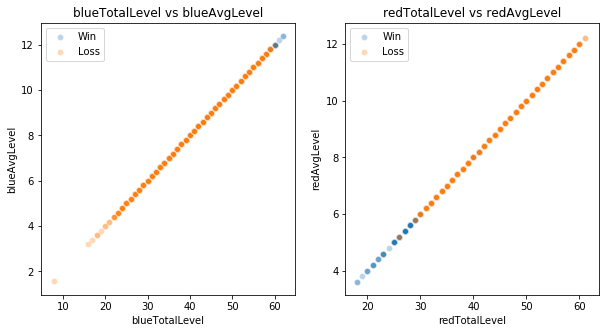

In [374]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalLevel', 'blueAvgLevel')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalLevel', 'redAvgLevel')

The scatterplot by class shows that the higher the Blue team's total and average levels, the more likely they are to win.

On the other hand, the lower the overall and average level of the Red Team, the more likely they were to win.

#### 3.5.4.2 TotalGolds vs Kills (0.92)

It can be seen that the total acquisition gold and the kill count have a very strong positive correlation.

Similarly, the number of deaths is equal to the number of kills of the opponent, so it shows the same correlation.

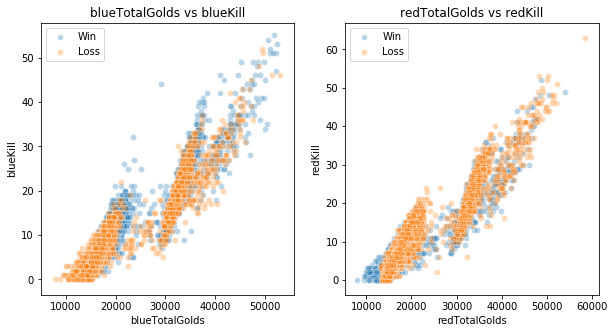

In [375]:
f = plt.figure(figsize = (10,5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalGolds', 'blueKill')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalGolds', 'redKill')

#### 3.5.4.3 TotalGolds vs TotalLevel (0.89)

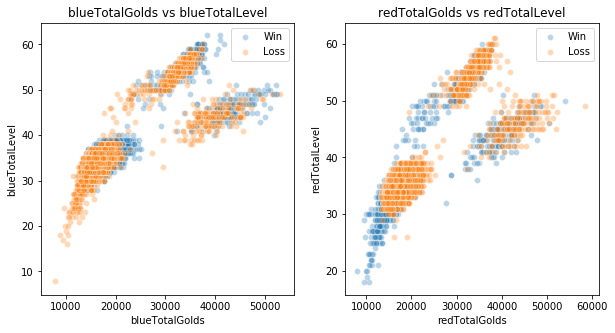

In [376]:
f = plt.figure(figsize = (10,5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalGolds', 'blueTotalLevel')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalGolds', 'redTotalLevel')

#### 3.5.4.4 blueTotalLevel vs redTotalLevel (0.88)

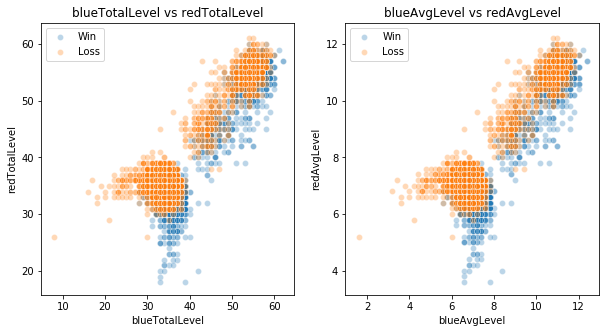

In [377]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalLevel', 'redTotalLevel')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'blueAvgLevel', 'redAvgLevel')

#### 3.5.4.5 TotalLevel vs Assist (0.87)

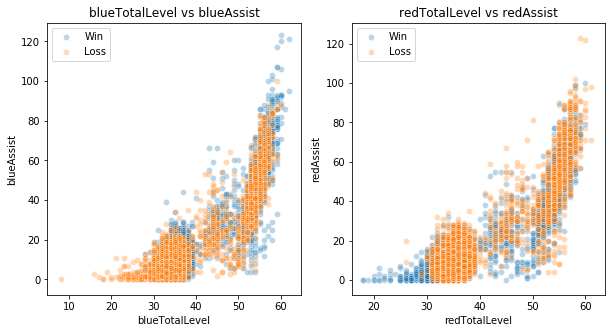

In [378]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalLevel', 'blueAssist')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalLevel', 'redAssist')

#### 3.5.4.5 Kill vs Assist (0.86)

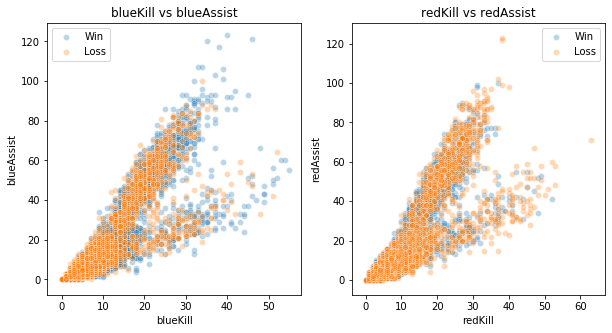

In [379]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueKill', 'blueAssist')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redKill', 'redAssist')

#### 3.5.4.6 Assist vs Death (0.86)

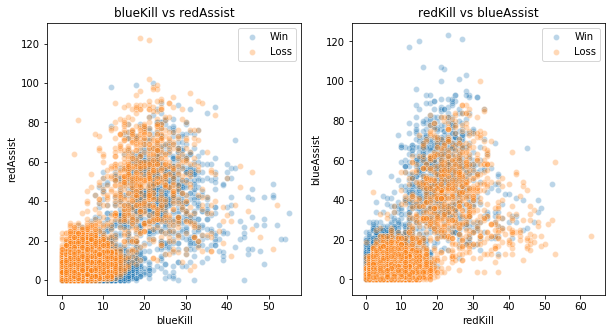

In [380]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueKill', 'redAssist')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redKill', 'blueAssist')

#### 3.5.4.7 TotalLevel vs TotalJungleMinionKills (-0.74)

The two variables showed the strongest negative correlation in the data, but the scatterplot shows that they are not significant.

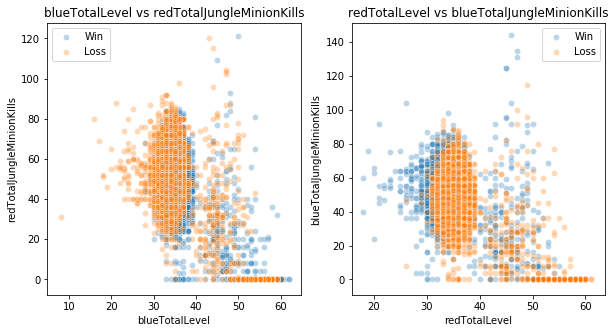

In [381]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalLevel', 'redTotalJungleMinionKills')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalLevel', 'blueTotalJungleMinionKills')

#### 3.5.4.8 TotalLevel vs TotalMinionKills (-0.73)

The two variables showed the strongest negative correlation in the data, but the scatterplot shows that they are not significant.

However, it can be seen that data form two clusters according to levels.

If the Blue team has a higher level and the Red team has a lower level, the Blue team has a higher winning percentage.

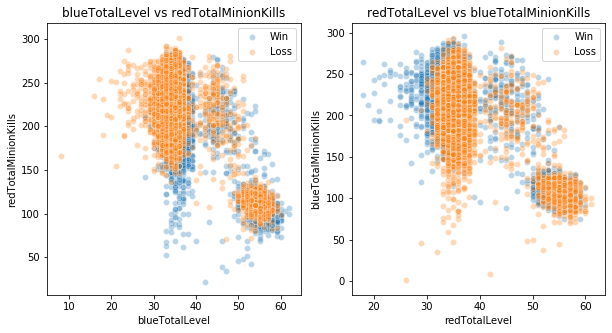

In [382]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
ScatterplotByClass(train, 'blueTotalLevel', 'redTotalMinionKills')

f.add_subplot(1, 2, 2)
ScatterplotByClass(train, 'redTotalLevel', 'blueTotalMinionKills')

## 3.6 Winning Frequency by Level of Blue and Red Team
Based on the content so far, it has been shown that Tim Byeolvell has a lot of influence on victory. This time, check the percentage of victories according to the average level of each team.

In [383]:
def Pivoting_agg(data, grouping):
    df = data.groupby(grouping).sum()[['blueWins']].reset_index()
    df['blueWinsPerc'] = df['blueWins'] / sum(df['blueWins'])
    
    return df

In [384]:
avglevel_wins_table = Pivoting_agg(train, 'blueAvgLevel')
avglevel_lose_table = Pivoting_agg(train, 'redAvgLevel')

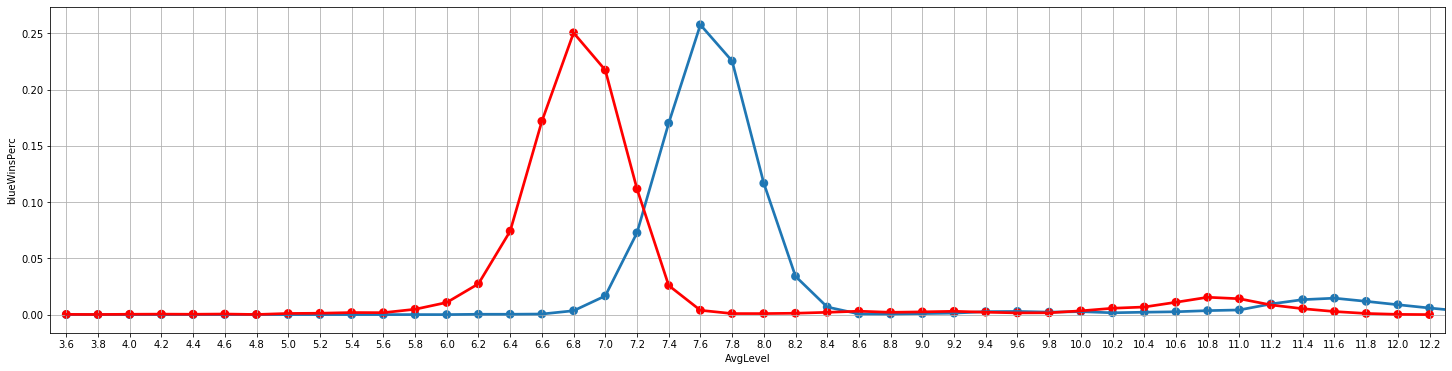

In [385]:
plt.figure(figsize = (25,6))

sns.pointplot(x = 'blueAvgLevel', y = 'blueWinsPerc', data = avglevel_wins_table)
sns.pointplot(x = 'redAvgLevel', y = 'blueWinsPerc', data = avglevel_lose_table, color = 'r')

plt.xlabel("AvgLevel")
plt.grid()
plt.show()

## 3.7 Winning Frequency by Kill, Assist and Death of Blue and Red Team

In [386]:
bluekill_wins_table = Pivoting_agg(train, 'blueKill')
redkill_wins_table = Pivoting_agg(train, 'redKill')

blueassist_wins_table = Pivoting_agg(train, 'blueAssist')
redassist_wins_table = Pivoting_agg(train, 'redAssist')

bluedeath_wins_table = Pivoting_agg(train, 'blueDeath')
reddeath_wins_table = Pivoting_agg(train, 'redDeath')

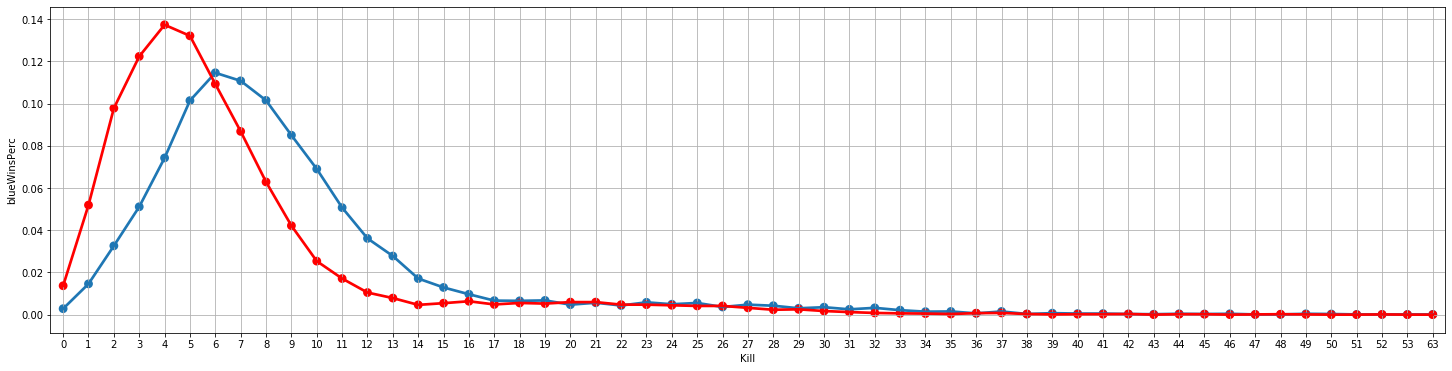

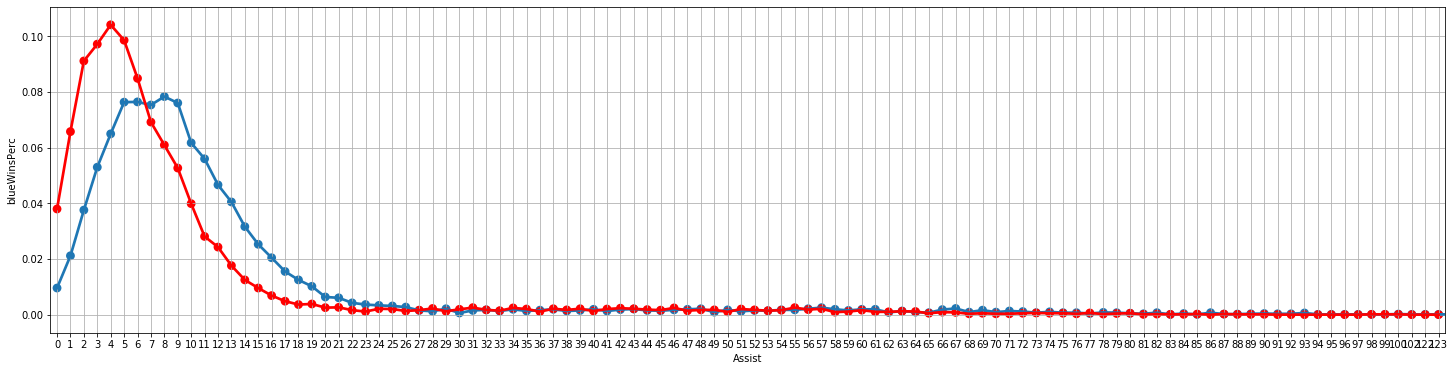

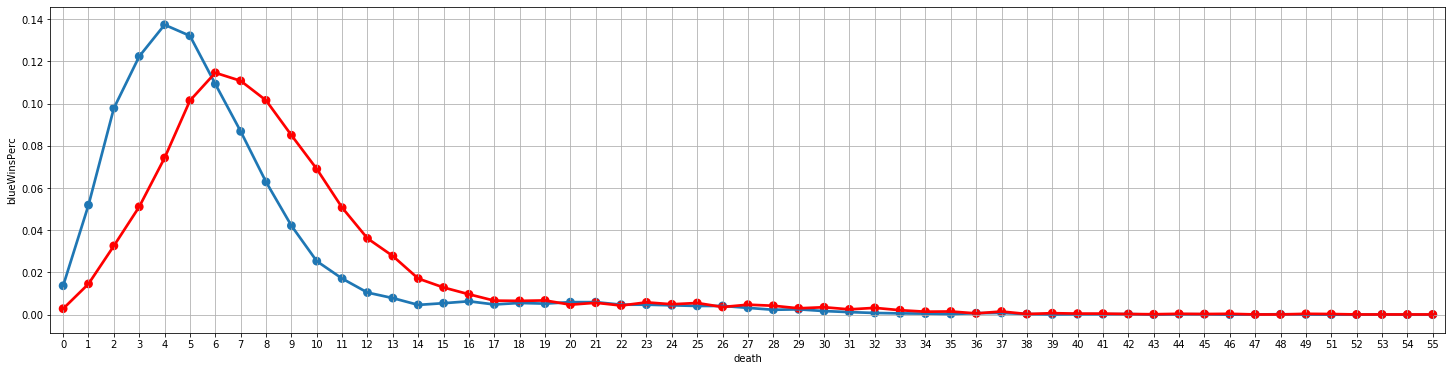

In [387]:
plt.figure(figsize = (25,6))

sns.pointplot(x = 'blueKill', y = 'blueWinsPerc', data = bluekill_wins_table)
sns.pointplot(x = 'redKill', y = 'blueWinsPerc', data = redkill_wins_table, color = 'r')

plt.xlabel("Kill")
plt.grid()
plt.show()

plt.figure(figsize = (25,6))

sns.pointplot(x = 'blueAssist', y = 'blueWinsPerc', data = blueassist_wins_table)
sns.pointplot(x = 'redAssist', y = 'blueWinsPerc', data = redassist_wins_table, color = 'r')

plt.xlabel("Assist")
plt.grid()
plt.show()

plt.figure(figsize = (25,6))

sns.pointplot(x = 'blueDeath', y = 'blueWinsPerc', data = bluedeath_wins_table)
sns.pointplot(x = 'redDeath', y = 'blueWinsPerc', data = reddeath_wins_table, color = 'r')

plt.xlabel("death")
plt.grid()
plt.show()

# 4. Preprocessing

Category variables perform One Hot Encoding.

Through exploratory data analysis, all observations with unusual category values are deleted and then preprocessed.

It is expected that this process will reduce the complexity of the model and prevent it from becoming overfit.

In [388]:
multi_cat_cols = ['blueFirstTowerLane', 'blueDragnoType', 'redDragnoType', 'redFirstTowerLane']

In [389]:
def Preprocess(data):
    # Drop impossible rows
    blue_impossible_row_indice = data.loc[(~data["blueDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])) & (data['blueFirstDragon'] == 1)].index
    red_impossible_row_indice = data.loc[(~data["redDragnoType"].isin(["['FIRE_DRAGON']", "['WATER_DRAGON']", "['AIR_DRAGON']", "['EARTH_DRAGON']"])) & (data['redFirstDragon'] == 1)].index
    
    data.drop(blue_impossible_row_indice, inplace = True)
    data.drop(red_impossible_row_indice, inplace = True)
    data.reset_index(drop = True, inplace = True)
    # Add Kd/a Columns
    data['blueKd/a'] = (data['blueKill'] + data['blueAssist']) / data['blueDeath']
    data['redKd/a'] = (data['redKill'] + data['redAssist']) / data['redDeath']
    
    data.loc[~np.isfinite(data['blueKd/a']), 'blueKd/a'] = (data['blueKill'] + data['blueAssist']) / 1
    data.loc[~np.isfinite(data['redKd/a']), 'redKd/a'] = (data['redKill'] + data['redAssist']) / 1
    
    # One Hot Encoding
    global multi_cat_cols
    encoder = OneHotEncoder()
    cat_df = encoder.fit_transform(data[multi_cat_cols])
    cat_df_cols = encoder.get_feature_names(multi_cat_cols)
    cat_df = pd.DataFrame(cat_df.todense(), columns = cat_df_cols)
    
    prep_data = pd.concat([data.drop(columns = multi_cat_cols), cat_df], axis = 1)
    prep_data.drop(columns = 'gameId', inplace = True)
    
    return prep_data.drop(columns = 'blueWins'), prep_data['blueWins']

In [390]:
prep_X_train, prep_y_train = Preprocess(train)
prep_X_test, prep_y_test = Preprocess(test)

print("Preprocessed X train Data shape:", prep_X_train.shape)
print("Preprocessed X test Data shape:", prep_X_test.shape)

Preprocessed X train Data shape: (19731, 64)
Preprocessed X test Data shape: (6583, 64)


Due to the difference in the number of values in category variables, the number of variables in training data and test data is different. 

Add a column of training data that does not exist within the test data and replace it with zero.

In [391]:
diff_cols = set(prep_X_train.columns) - set(prep_X_test.columns)
diff_cols

for col in diff_cols:
    prep_X_test[col] = 0
    
print("Preprocessed X train Data shape:", prep_X_train.shape)
print("Preprocessed X test Data shape:", prep_X_test.shape)

Preprocessed X train Data shape: (19731, 64)
Preprocessed X test Data shape: (6583, 64)


In [392]:
diff_cols = set(prep_X_test.columns) - set(prep_X_train.columns)
diff_cols

for col in diff_cols:
    prep_X_train[col] = 0
    
print("Preprocessed X train Data shape:", prep_X_train.shape)
print("Preprocessed X test Data shape:", prep_X_test.shape)

Preprocessed X train Data shape: (19731, 64)
Preprocessed X test Data shape: (6583, 64)


# 5. Baseline Modeling

The independent variables of a given data are often highly correlated. Therefore, modeling is performed using the RandomForest algorithm because performance degradation of the model is expected due to multicollinearity.

## 5.1 RandomForest
The RandomForest algorithm is an ensemble algorithm that has been tagged using several independent decision tree algorithms. The tree-based algorithm features the following:
1. You don't have to consider multicollinearity.
2. Because it is a tree-based algorithm, it does not require standardization of data.
3. Since it is an ensemble model, some performance is guaranteed.

The fatal drawback of the ensemble model is that it is a black box model that does not know why such a result came out. To compensate for the shortcomings, Feature Importance and SHAP and Partial Dependence Plot will be identified to identify which variables are important variables in the classification.

In [393]:
clf = RandomForestClassifier(max_depth = 7)
clf.fit(prep_X_train, prep_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [394]:
result = clf.predict(prep_X_test)
print("Accuracy: ", accuracy_score(prep_y_test, result))
confusion_matrix(result, prep_y_test)

Accuracy:  0.7355309129576181


array([[2410,  857],
       [ 884, 2432]], dtype=int64)

### 5.1.1 Feature Importance

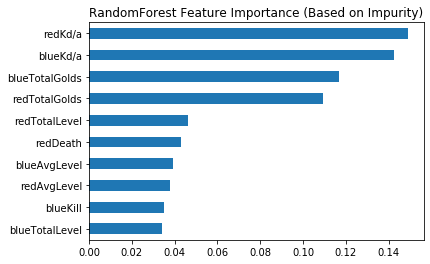

In [395]:
feature_importance = pd.Series(clf.feature_importances_, index = prep_X_train.columns)
feature_importance.nlargest(10).sort_values(ascending = True).plot(kind = 'barh')

plt.title("RandomForest Feature Importance (Based on Impurity)")
plt.show()

The characteristics of feature importance based on impurity are as follows:

- impurity-based importances are biased towards high cardinality features;

- impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).

### 5.1.2 Permutation Importance

As an alternative, the permutation importances of rf are computed on a held out test set.

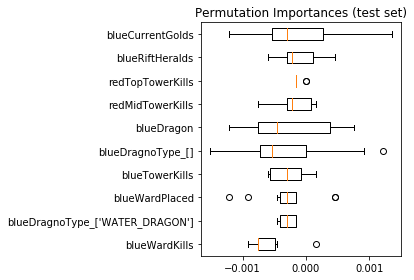

In [396]:
permutation_imp = permutation_importance(clf, prep_X_test, prep_y_test, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_test.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()

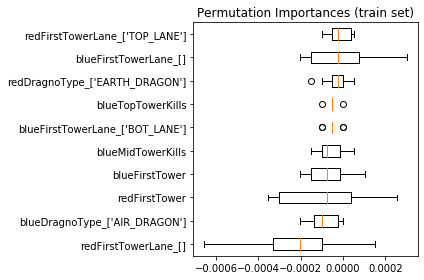

In [397]:
permutation_imp = permutation_importance(clf, prep_X_train, prep_y_train, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_train.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()

plt.show()

Permutation Importance of training data and test data show that it is completely different. One of the advantages of Permutation Importance is that you can see the variables that cause the model to overfit. 

After removing all the top 10 parameters of Permutation Importance from the training data, we will try to refit the model.

In [398]:
prep_X_train = prep_X_train.drop(columns = prep_X_train.columns[sorted_idx_top10])
prep_X_test = prep_X_test.drop(columns = prep_X_test.columns[sorted_idx_top10])

print("Preprocessed X train Data shape:", prep_X_train.shape)
print("Preprocessed X test Data shape:", prep_X_test.shape)

Preprocessed X train Data shape: (19731, 54)
Preprocessed X test Data shape: (6583, 54)


In [399]:
clf = RandomForestClassifier(max_depth = 7, random_state = 42)
clf.fit(prep_X_train, prep_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [401]:
result = clf.predict(prep_X_test)
print("Accuracy: ", accuracy_score(prep_y_test, result))
confusion_matrix(result, prep_y_test)

Accuracy:  0.732492784444782


array([[2413,  880],
       [ 881, 2409]], dtype=int64)

If you compare the accuracy after removing 10 variables, you can see that there is little difference.

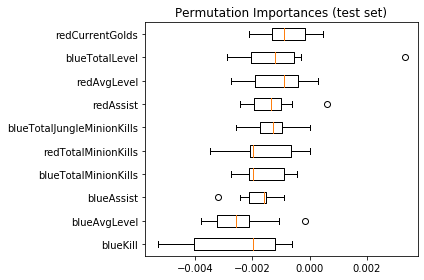

In [402]:
permutation_imp = permutation_importance(clf, prep_X_test, prep_y_test, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_test.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()

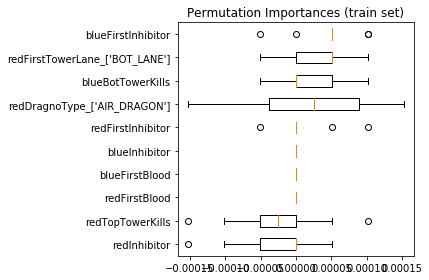

In [403]:
permutation_imp = permutation_importance(clf, prep_X_train, prep_y_train, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_train.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()

plt.show()

So far, we have not found common ground between training data and the Permutation importance of test data. Perform the elimination of variables one more time.

In [404]:
prep_X_train = prep_X_train.drop(columns = prep_X_train.columns[sorted_idx_top10])
prep_X_test = prep_X_test.drop(columns = prep_X_test.columns[sorted_idx_top10])

print("Preprocessed X train Data shape:", prep_X_train.shape)
print("Preprocessed X test Data shape:", prep_X_test.shape)

Preprocessed X train Data shape: (19731, 44)
Preprocessed X test Data shape: (6583, 44)


In [405]:
clf = RandomForestClassifier(max_depth = 7, random_state = 42)
clf.fit(prep_X_train, prep_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [406]:
result = clf.predict(prep_X_test)
print("Accuracy: ", accuracy_score(prep_y_test, result))
confusion_matrix(result, prep_y_test)

Accuracy:  0.7343156615524836


array([[2405,  860],
       [ 889, 2429]], dtype=int64)

If you compare the accuracy after removing 10 variables, you can see that there is little difference. 

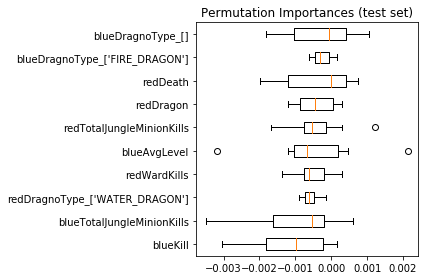

In [407]:
permutation_imp = permutation_importance(clf, prep_X_test, prep_y_test, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_test.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()

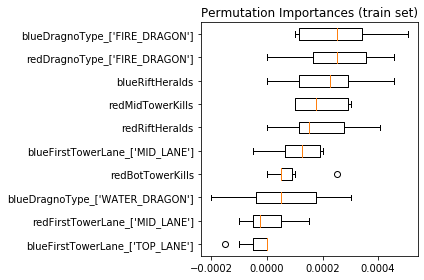

In [408]:
permutation_imp = permutation_importance(clf, prep_X_train, prep_y_train, n_repeats = 10, random_state = 42)
sorted_idx_top10 = permutation_imp.importances_mean.argsort()[:10]

fig, ax = plt.subplots()
ax.boxplot(permutation_imp.importances[sorted_idx_top10].T,
           vert=False, labels=prep_X_train.columns[sorted_idx_top10])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()

plt.show()

If you want a model that requires high accuracy, these methods may be meaningless. However, if minute accuracy differences do not matter much to the project, these methods can be variable selection methods.

## SHAP (Shapley Addictive exPlanations)

SHAP VALUE interprets the impact on a particular feature by comparing certain values with predictions.A number that indicates how much each contributor (variable) contributed to a particular result, introducing the concept from game theory.

In [409]:
def SHAP_Result(model, test, row_index, method):
    idx_test = test.iloc[row_index]
    idx_test_array = idx_test.values.reshape(1, -1)
    
    print("Blue Team Win Probability: ", model.predict_proba(idx_test_array).flatten()[1])
    
    if method == 'tree':
        explainer = shap.TreeExplainer(model)
        
    elif method == 'kernel':
        explainer = shap.KernelExplainer(model)
        
    shap_values = explainer.shap_values(idx_test)
    
    shap.initjs()
    
    return shap.force_plot(explainer.expected_value[1], shap_values[1], idx_test)

In [414]:
SHAP_Result(clf, prep_X_test, row_index = 10, method = 'tree')

Blue Team Win Probability:  0.12763956426569442


In [415]:
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(prep_X_test)

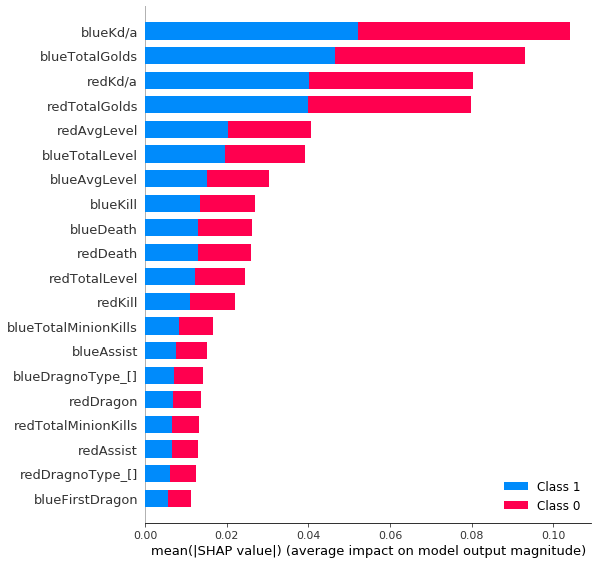

In [416]:
shap.summary_plot(shap_values, prep_X_test, plot_type = 'bar')

## Partial Dependence Plot

In [418]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
prep_X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in prep_X_train.columns.values]
prep_X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in prep_X_test.columns.values]

In [419]:
k = 5
iteration = 1
kf = KFold(n_splits = k)
score = np.zeros(k)

for train_idx, val_idx in kf.split(prep_X_train):
    print("KFOLD Evaluation ({} Iterations)".format(iteration))
    
    X_tr, X_val = prep_X_train.iloc[train_idx], prep_X_train.iloc[val_idx]
    y_tr, y_val = prep_y_train.iloc[train_idx], prep_y_train.iloc[val_idx]
    
    clf = XGBClassifier(objective = 'binary:logistic', random_state = 42)
    clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], verbose = False, early_stopping_rounds = 10)
    
    y_val_result = clf.predict(X_val)
    print("ACCURACY SCORE: ", accuracy_score(y_val, y_val_result),"\n")
    
    score[iteration - 2] = accuracy_score(y_val, y_val_result)
    
    iteration += 1
    
print("Mean of {} Fold Cross validation Accuracy Score: ".format(k), score.mean())

del iteration, clf

KFOLD Evaluation (1 Iterations)
ACCURACY SCORE:  0.7362553838358247 

KFOLD Evaluation (2 Iterations)
ACCURACY SCORE:  0.7417638114546377 

KFOLD Evaluation (3 Iterations)
ACCURACY SCORE:  0.7318803852002027 

KFOLD Evaluation (4 Iterations)
ACCURACY SCORE:  0.739229599594526 

KFOLD Evaluation (5 Iterations)
ACCURACY SCORE:  0.7478459199189053 

Mean of 5 Fold Cross validation Accuracy Score:  0.7393950200008194


In [420]:
columns = prep_X_train.columns.tolist()

prep_X_test = prep_X_test.reindex(columns = columns)

In [421]:
clf = XGBClassifier(objective = 'binary:logistic', random_state = 42)
clf.fit(prep_X_train, prep_y_train)

xgb_prediction = clf.predict(prep_X_test)

print("XGBoost Classifier Accuracy Score: ", accuracy_score(xgb_prediction, prep_y_test))

XGBoost Classifier Accuracy Score:  0.73568281938326
